# Python for Machine Learning

### *Session \#4*


### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**UP/DOWN ARROWS** --> Move cursor between cells (then ENTER to start typing)

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Logistic Regression

### Warm Ups

*Type the given code into the cell below*

---

In [169]:
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from yellowbrick.classifier import ConfusionMatrix, ClassPredictionError, ROCAUC, PrecisionRecallCurve
from yellowbrick.target import class_balance

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

df = pd.read_csv('heart_attack.csv')

**Split into data sets**: 
```python
X = df[['age']]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y)
```

In [238]:
X = df[['age']]
y = df['heart_attack']
X_train, X_test, y_train, y_test = train_test_split(X, y)

**Create and fit classifier**: 
```python
model = LogisticRegression()
model.fit(X_train, y_train)
```

In [239]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Use model to classify**: `model.predict(X_test)`

**Use model to get probabilities**: `model.predict_proba(X_test)`

### Exercises
---

**1. Graph these probabilities with** `plt.plot()` 

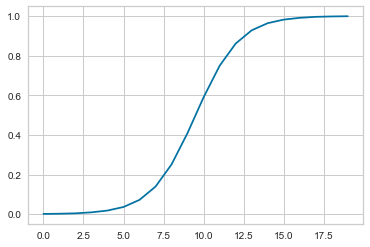

In [108]:
probabilities = np.array([0.001, 0.002, 0.004, 0.009, 
                         0.018, 0.036, 0.072, 0.139, 
                         0.251, 0.41 , 0.59 , 0.749, 
                         0.861, 0.928, 0.964, 0.982, 
                         0.991, 0.996, 0.998, 0.999])


plt.plot(probabilities)

**2. Now convert these probabilities into log-odds.**

**First divide** `probabilities` **by** `1 - probabilities` 

**Use** `np.log()` **afterwards, and** `.plot()` **the result.**

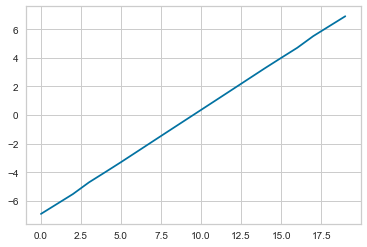

In [113]:
odds = probabilities / (1-probabilities)

log_odds = np.log(odds)

plt.plot(log_odds)

**3. Let's go from log-odds back to probabilities now!**

**Copy/paste the slope from** `model.coef_` **and the intercept from** `model.intercept_`

**Save them as** `slope` **and** `intercept`

In [240]:
slope = model.coef_
intercept = model.intercept_

**4. Plot the underlying linear model using plt.plot().**

**First feed in** `X_test` **as the x-axis and** `X_test*slope + intercept` **as the y-axis**

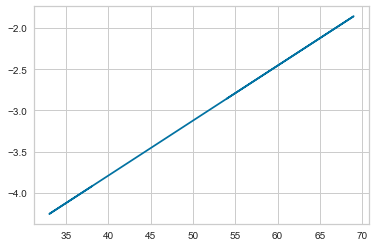

In [253]:
plt.plot(X_test, X_test*slope + intercept)

**5. Use** `plt.scatter` **to plot** `X_test` **and** `y_test`, **and also to plot** `curve_x` and `curve_y` **which show the curve of the logistic classifier**

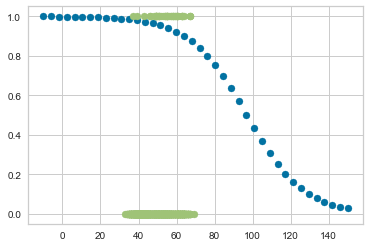

In [251]:
curve_x = np.linspace(-10, 150, 40).reshape(-1, 1)
curve_y = [a for a,b in model.predict_proba(curve_x)]

plt.scatter(curve_x, curve_y)
plt.scatter(X_test, y_test)

## II. ROC Curves and Class Imbalance

### Warm Ups

*Type the given code into the cell below*

---

**Create and fit classifier**: 
```python
model_roc = ROCAUC(model)
model_roc.fit(X_train, y_train)
model_roc.score(X_test, y_test)
model_roc.show()
```

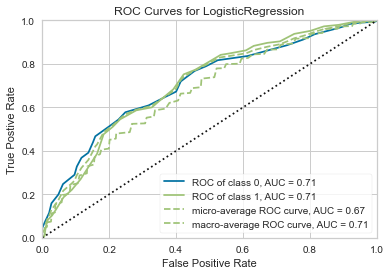

In [188]:
model_roc = ROCAUC(model)
model_roc.fit(X_train, y_train)
model_roc.score(X_test, y_test)
model_roc.show()

**Create ClassBalance visualization:** `class_balance(y)`

**Create and fit classifier**: 
```python
model_prc = PrecisionRecallCurve(model)
model_prc.fit(X_train, y_train)
model_prc.score(X_test, y_test)
model_prc.show()
```

### Exercises
---

**1. Interpret the ROC curve below. What is the highest sensitivity we can reach while keeping false positives under 20% (ie. specificity > 0.8)?**

**If we care about both classes equally, what sensitivity and specificity should we choose?**

![image.png](../images/roc.png)

**2. If you were creating a machine learning model to catch credit card fraud, would you use an ROC curve or a precision-recall curve?**

In [ ]:
# Precision-recall, because fraud data is HIGHLY imbalanced.

**3. Train and plot an ROC curve with a** `KNeighborsClassifier` **model and a** `LogisticRegression` **model. Which model performs better with this data, according to the AUC?** 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

knn = ROCAUC(KNeighborsClassifier())
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
knn.show()

log = ROCAUC(LogisticRegression())
log.fit(X_train, y_train)
log.score(X_test, y_test)
log.show()

**4. Let's examine more severe class imbalance.**

**Run the code below to drop most of the positive cases, then split the data into X and y again**

**Create a** `class_balance` **visualization to verify that the classes are now very imbalanced.**

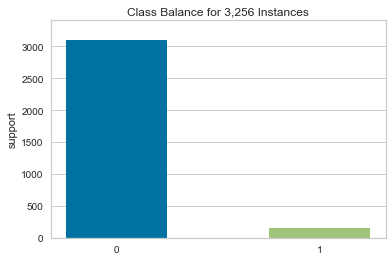

ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x12c2ba790>,
             colormap=None, colors=None, labels=None)

In [231]:
df = pd.read_csv('heart_attack.csv')

df.drop(df.query('heart_attack == 1').sample(n=400).index, inplace=True)
X = df.drop('heart_attack', 1)
y = df['heart_attack']
X_train, X_test, y_train, y_test = train_test_split(X, y)

class_balance(y)

**5. Paste and rerun your code from Question 3. Which model's performance has suffered more? Why**

**Replace the** `ROCAUC` **visualizers with** `PrecisionRecallCurve` **visualizers and rerun to get a minority-class focused view on performance.**

Hint: To help deal with limited data, you may need to pass `max_iter=10000` when creating your LogisticRegression model

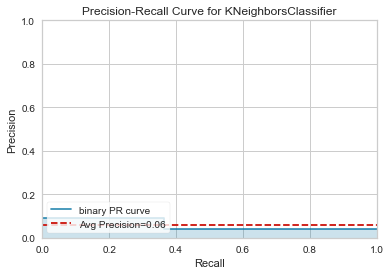

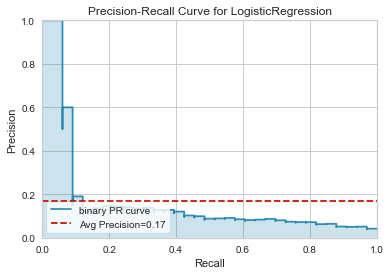

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

knn = PrecisionRecallCurve(KNeighborsClassifier())
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
knn.show()

log = PrecisionRecallCurve(LogisticRegression(max_iter=10000))
log.fit(X_train, y_train)
log.score(X_test, y_test)
log.show()

## III. Stratified Sampling and Oversampling

### Warm Ups

*Type the given code into the cell below*

---

**Use stratified sampling:**
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
```

**Use RandomOverSampler to balance data:**
```python
sampler = RandomOverSampler()
sampler.fit_resample(X_train, y_train)
```

**Use RandomOverSampler in pipeline:**
```python
model = make_pipeline(RandomOverSampler(), LogisticRegression())
```

### Exercises
---

**1. Inside the for-loop, call** `train_test_split()` **WITHOUT the stratify parameter**

**Then within the for-loop call** `y_test.sum()` **to count the number of positive cases.**

**Rerun with the stratify parameter set to** `y`

In [237]:
for i in range(10):
    
    # Add your code here
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
    print(y_test.sum())

39
39
39
39
39
39
39
39
39
39


**2. Create a** `RandomOverSampler()` **and use .fit_resample() on X_train and y_train**

**This will return two arrays -- the rebalanced versions of** `X_train` **and** `y_train` 

**Take the mean of the new** `y_train` **to show that it's balanced**

In [265]:
ros = RandomOverSampler()
new_X_train, new_y_train = ros.fit_resample(X_train, y_train)
new_y_train.mean()

0.5

**3. Fit a** `LogisticRegression()` **model to the training data, and use it to plot a ConfusionMatrix**

**What is the accuracy and sensitivity of the model?**

0.952088452088452

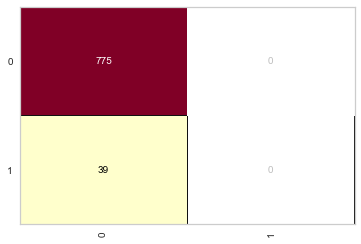

In [269]:
model = LogisticRegression()

model_cm = ConfusionMatrix(model)
model_cm.fit(X_train, y_train)
model_cm.score(X_test, y_test)
# model_cm.show()

**4. Create a pipeline with a** `RandomOverSampler` **and** `LogisticRegression()` **and fit it to the training data**

**What is the accuracy and sensitivity of the new model?**

0.6007371007371007

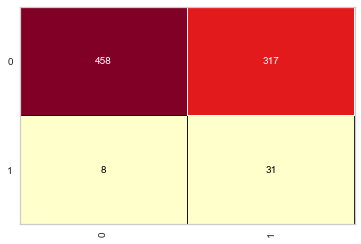

In [270]:
model = make_pipeline(RandomOverSampler(), LogisticRegression())

model_cm = ConfusionMatrix(model)
model_cm.fit(X_train, y_train)
model_cm.score(X_test, y_test)
# model_cm.show()